<a href="https://colab.research.google.com/github/An1ndya/IIT-Kharagpur/blob/main/Gensim_Word2Vec_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
f = open('Text 1.txt', 'r')
paragraph = f.read()
print(paragraph)
f.close()

Once upon a time a wicked King from a faraway country invaded the land where a Queen ruled. The invader King captured the Queen and her baby daughter as prisoners. When he returned to his kingdom, he shut them both into the highest room of a tall tower. The room was very tiny and bare, with only one table and a very hard bed. The king is a man of strength and power as everyone thought.

Then the enemy King sent for a fairy who lived near his kingdom. He nearly pushed the Fairy up the stairs to the Queen's room. The Fairy was touched by the sight of the Queen's miserable condition.  When she kissed the Queen's hand, the Fairy whispered to her, "Courage, madam! I think I see a way to help you."

The Queen whispered her thanks. Then the wicked King cried harshly, "Silence!"  He turned to the Fairy. "I brought you here for one reason and one reason only. Tell me this: Will this baby girl grow up to be a worthy bride for my son?"

The Fairy answered that indeed, the Princess would grow up t

In [3]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [11]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
for i in range(len(sentences)):
  sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

In [12]:
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)
words = model.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


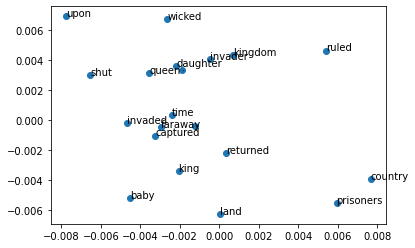

In [14]:
# Visualise the embedding
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = model[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
max_visual = 20
pyplot.scatter(result[:max_visual, 0], result[:max_visual, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
  if i<max_visual:
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [15]:
# Finding Word Vectors
vector = model.wv['queen']
print(vector)

[-5.9020019e-04 -7.6281367e-04  1.1969967e-03 -3.0007681e-03
 -3.4086534e-03 -3.7010019e-03  2.5467139e-03 -2.8871805e-03
  3.8925072e-03  4.9522663e-03  1.9300941e-04 -2.2013900e-03
  3.9125206e-03  4.9287062e-03 -1.2994544e-03  9.3090831e-04
  3.0242901e-03 -8.7037456e-04  4.3882555e-03  2.9769156e-03
 -1.7473835e-03 -2.0536836e-03  3.7897569e-03  2.2978317e-03
 -3.7590952e-03 -1.3694031e-03  4.1068718e-03 -3.0102816e-03
  5.2404394e-03  3.9761430e-03 -1.9168343e-03 -6.4944848e-04
  9.9108997e-04  4.1666469e-03 -4.6918816e-03 -2.2507554e-03
  9.5727853e-05  2.5823198e-03 -7.3694967e-04  2.1718131e-04
 -1.1201020e-03  4.7969255e-03 -1.4977555e-03 -3.6102138e-03
 -1.4185435e-03 -4.0544337e-03 -2.8449672e-03  5.0486583e-04
  3.9252994e-04  4.2585167e-03 -4.1199001e-03  1.8621067e-03
  2.8837987e-03 -8.1633613e-04 -4.2620394e-03  3.6364431e-03
  4.6978355e-03 -1.4300697e-03  8.7041967e-04  3.7324079e-04
  4.2499672e-03 -4.5374450e-03  1.8468862e-04  1.8752780e-04
 -2.7586638e-03 -1.99964

In [16]:
# Most similar words
similar = model.wv.most_similar('queen')

In [17]:
print(similar)

[('daughter', 0.33148127794265747), ('allowance', 0.3002910614013672), ('charmingly', 0.29212823510169983), ('danced', 0.2742643654346466), ('shut', 0.27092933654785156), ('plump', 0.264541357755661), ('cried', 0.23944351077079773), ('strength', 0.23501363396644592), ('made', 0.23299409449100494), ('anything', 0.23083540797233582)]


In [18]:
# Solving Today's Objective
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('daughter', 0.27915698289871216)]
